In [ ]:
1) Program on convolutional neural network to classify images from any standard dataset in the
public domain using Keras framework

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [6]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [7]:
x_train=x_train/225
x_test=x_test/225

In [8]:
x_train_flattened=x_train.reshape(len(x_train),28*28)

In [9]:
print(x_train_flattened.shape)

(60000, 784)


In [10]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [11]:
model= keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10,activation='sigmoid')])

In [12]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 1ms/step - loss: 0.2610 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1167 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0814 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0620 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0486 - accuracy: 0.9847


In [13]:
model.evaluate(x_test,y_test)
y_predicted=model.predict(x_test)
print((np.argmax(y_predicted[1])))

313/313 [==============================] - 1s 1ms/step - loss: 0.0967 - accuracy: 0.9709
2


In [14]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [15]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

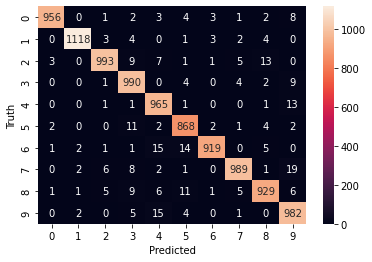

In [17]:
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()